Libraries

In [90]:
import pandas as pd # DataFrame
import numpy as np # Arrays
import seaborn as sns # Plotting
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.
from sklearn import svm # support vector machines
from sklearn.metrics import accuracy_score # Accuracy classification score. (tp + tn) / (tp + fn + tn + fn)
from sklearn.metrics import precision_score # Compute the precision. tp / (tp + fp)
from sklearn.metrics import recall_score # Compute the recall. tp / (tp + fn)
from sklearn.metrics import f1_score # Compute the F1 score, also known as balanced F-score or F-measure. F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import confusion_matrix # Compute confusion matrix to evaluate the accuracy of a classification.

Data Processing

In [91]:
df =  pd.read_csv('data.csv')

In [92]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [93]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [94]:
df.isnull().sum() # sum of missing values per column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [95]:
df = df.dropna() # drop the missing values

In [96]:
df.isnull().sum() # sum of missing values per column

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [97]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\leona\AppData\Local\Temp\ipykernel_10272\2100461462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [98]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [99]:
# Dependent column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [100]:
# Replace the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [101]:
# dependent values
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<AxesSubplot: xlabel='Education', ylabel='count'>

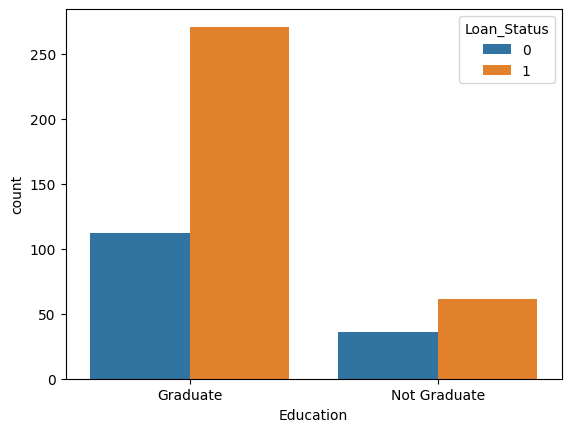

In [102]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot: >

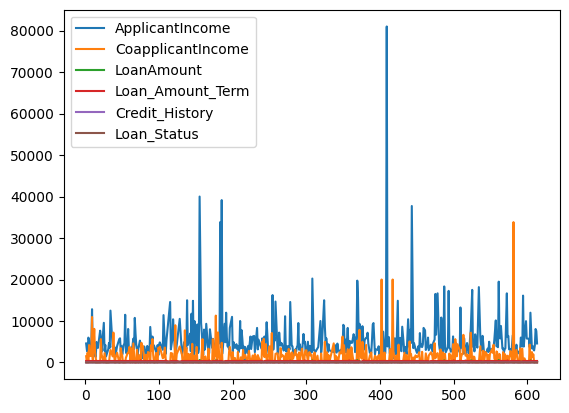

In [103]:
df.plot()

<AxesSubplot: xlabel='Married', ylabel='count'>

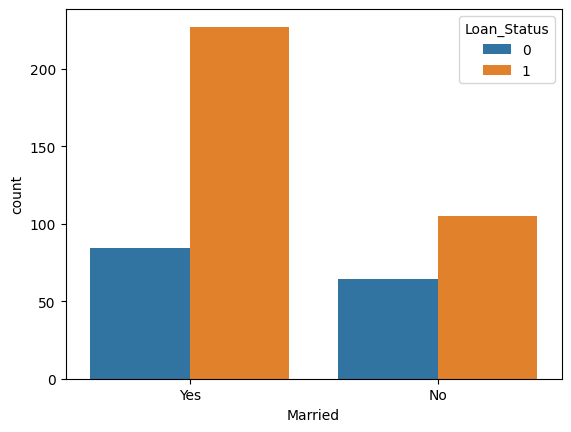

In [104]:
sns.countplot(x='Married',hue='Loan_Status',data=df)
# marital status and Loan status

In [105]:
# conver categorical columns to numerical
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [106]:
df # just numbers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [107]:
# separating the data & label
x = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [108]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Splitting data into train and test datasets

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=42)

In [110]:
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (321, 11) (159, 11)


In [111]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


Train model - Support Vector Machines

In [112]:
clf = svm.SVC(kernel='linear')

In [113]:
clf.fit(x_train,y_train)

SVC(kernel='linear')

Classification metrics

In [114]:
x_pred = clf.predict(x_train)
x_pred_test = clf.predict(x_test)

In [115]:
train_accuracy = accuracy_score(x_pred, y_train)
train_precision = precision_score(x_pred,y_train)
train_recall_score = recall_score(x_pred, y_train)
train_f1_score = f1_score(x_pred,y_train)
train_confusion_matrix = confusion_matrix(x_pred,y_train)

In [116]:
print("Train Data Metrics")
print('Accuracy score: ', train_accuracy)
print('Precision score: ', train_precision)
print('Recall score: ', train_recall_score)
print('f1_score: ', train_f1_score)
print('Confusion matrix: ')
print(train_confusion_matrix)

Train Data Metrics
Accuracy score:  0.7912772585669782
Precision score:  0.9819819819819819
Recall score:  0.7758007117437722
f1_score:  0.8667992047713717
Confusion matrix: 
[[ 36   4]
 [ 63 218]]


In [117]:
test_accuracy = accuracy_score(x_pred_test, y_test)
test_precision = precision_score(x_pred_test,y_test)
test_recall_score = recall_score(x_pred_test, y_test)
test_f1_score = f1_score(x_pred_test,y_test)
test_confusion_matrix = confusion_matrix(x_pred_test,y_test)

In [118]:
print("Test Data Metrics")
print('Accuracy score: ', test_accuracy)
print('Precision score: ', test_precision)
print('Recall score: ', test_recall_score)
print('f1_score: ', test_f1_score)
print('Confusion matrix: ')
print(test_confusion_matrix)

Test Data Metrics
Accuracy score:  0.8176100628930818
Precision score:  0.9727272727272728
Recall score:  0.8045112781954887
f1_score:  0.8806584362139919
Confusion matrix: 
[[ 23   3]
 [ 26 107]]
